In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
X = df[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
clust_norm = scaler.transform(X)
clust_norm

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [35]:
mean_cluster = 3
k_mean = KMeans(init='k-means++',n_clusters = mean_cluster, n_init = 12)
k_mean.fit(X)
labels = k_mean.labels_
labels

C:\Users\yassin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0])

In [37]:
X['cluster_help'] = labels
df.head()

C:\Users\yassin\AppData\Local\Temp\ipykernel_12784\3165568926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster_help'] = labels


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_help
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [39]:
X.groupby('cluster_help').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_help,,,,,,,,,
0,47.389844,35.865617,6.332031,45.921609,8569.242188,8.957648,67.873437,3.263359,4438.390625
1,6.228571,96.442857,5.712857,68.571429,80342.857143,6.388714,80.285714,1.767143,65442.857143
2,8.800000,49.978125,8.991563,46.021875,37621.875000,3.383312,79.156250,1.944687,35587.500000


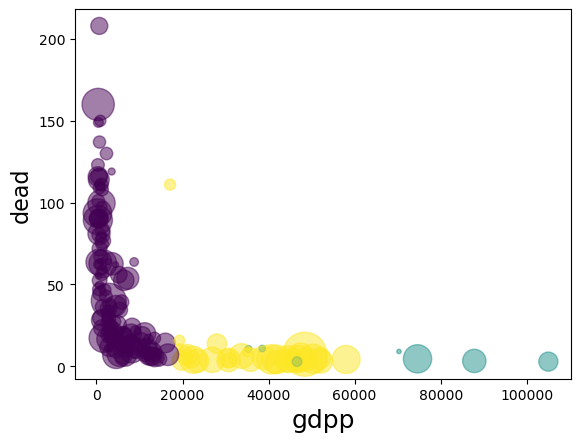

In [47]:
area = np.pi * (X.iloc[:,2])**2
plt.scatter(X.iloc[:,8],X.iloc[:,0], s=area, c=labels, alpha=0.5)
plt.xlabel('gdpp',fontsize=18)
plt.ylabel('dead',fontsize=16)
plt.show()

In [43]:
for cluster in range(mean_cluster):
    print(f"\country {cluster}'there are:")
    print(df[df['cluster_help'] == cluster]['country'].values)

\country 0'there are:
['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Azerbaijan' 'Bangladesh' 'Barbados' 'Belarus'
 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon'
 'Cape Verde' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Eritrea'
 'Estonia' 'Fiji' 'Gabon' 'Gambia' 'Georgia' 'Ghana' 'Grenada' 'Guatemala'
 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Hungary' 'India' 'Indonesia'
 'Iran' 'Iraq' 'Jamaica' 'Jordan' 'Kazakhstan' 'Kenya' 'Kiribati'
 'Kyrgyz Republic' 'Lao' 'Latvia' 'Lebanon' 'Lesotho' 'Liberia' 'Libya'
 'Lithuania' 'Macedonia, FYR' 'Madagascar' 'Malawi' 'Malaysia' 'Maldives'
 'Mali' 'Mauritania' 'Mauritius' 'Micronesia, Fed. Sts.' 'Moldova'
 'Mongolia' 'Montenegro' 'Morocco' 'Mozambique' 'Mya

<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
C:\Users\yassin\AppData\Local\Temp\ipykernel_12784\3918361153.py:2: SyntaxWarning: invalid escape sequence '\c'
  print(f"\country {cluster}'there are:")
